In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import seaborn as sns
import pandas as pd
import random
import statistics
import gzip
from collections import Counter
import scipy
import scipy.stats

In [2]:
overlap_LoF_hits = [76, 78, 79, 82, 88, 106, 113, 114, 117, 118, 119, 121, 127, 128, 129, 131, 135, 136, 138, 139, \
                    141, 165, 190, 191, 193, 199, 203, 204, 207, 208, 209, 219, 286, 289, 290, 293, 294, 312, 315, \
                    318, 322, 325, 326, 327, 328, 329, 330]
overlap_GoF_hits = [87, 101, 124, 130, 170, 187, 189, 218, 231, 251, 268, 283, 313, 345, 355, 359, 362, 375, 392, 410]
overlap_CoF_hits = [47, 120, 122, 215, 306, 311, 321, 332]


In [3]:
interactions_dict_3SN6 = {}
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/3SN6_R.tsv') as data:
    print (data.readline())
    print (data.readline())
    for line in data:
        ls = line.split()
        if ls[1] not in interactions_dict_3SN6:
            interactions_dict_3SN6[ls[1]] = []
        res1 = int(ls[2].split(':')[2])
        res2 = int(ls[3].split(':')[2])
        if res1 != res2 and int(res1) < 450 and int(res2) < 450:
            interactions_dict_3SN6[ls[1]].append([res1, res2])


# total_frames:1 beg:0 end:0 stride:1 interaction_types:hp,sb,pc,ps,ts,vdw,hb

# Columns: frame, interaction_type, atom_1, atom_2[, atom_3[, atom_4]]



In [4]:
interactions_dict_2RH1 = {}
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/2RH1_A.tsv') as data:
    print (data.readline())
    print (data.readline())
    for line in data:
        ls = line.split()
        if ls[1] not in interactions_dict_2RH1:
            interactions_dict_2RH1[ls[1]] = []
        res1 = int(ls[2].split(':')[2])
        res2 = int(ls[3].split(':')[2])
        if res1 != res2 and int(res1) < 450 and int(res2) < 450:
            interactions_dict_2RH1[ls[1]].append([res1, res2])

# total_frames:1 beg:0 end:0 stride:1 interaction_types:hp,sb,pc,ps,ts,vdw,hb

# Columns: frame, interaction_type, atom_1, atom_2[, atom_3[, atom_4]]



In [5]:
LoF_3SN6_hits_dict = {}
for var in overlap_LoF_hits:
    LoF_3SN6_hits_dict[var] = {}
    for interaction_type in interactions_dict_3SN6:
        LoF_3SN6_hits_dict[var][interaction_type] = []
        for interaction in interactions_dict_3SN6[interaction_type]:
            if var in interaction:
                LoF_3SN6_hits_dict[var][interaction_type].append([i for i in interaction if i != var ][0])

In [6]:
LoF_2RH1_hits_dict = {}
for var in overlap_LoF_hits:
    LoF_2RH1_hits_dict[var] = {}
    for interaction_type in interactions_dict_2RH1:
        LoF_2RH1_hits_dict[var][interaction_type] = []
        for interaction in interactions_dict_2RH1[interaction_type]:
            if var in interaction:
                LoF_2RH1_hits_dict[var][interaction_type].append([i for i in interaction if i != var ][0])

In [7]:
_3SN6_contacts_list = []
for hit in LoF_3SN6_hits_dict:
    contacts = False
    for interaction_type in LoF_3SN6_hits_dict[hit]:
        for pos in LoF_3SN6_hits_dict[hit][interaction_type]:
            if pos in overlap_LoF_hits:
                contacts = True
                if int(pos) > int(hit):
                    _3SN6_contacts_list.append((hit, pos))
    if contacts == False:
        print (hit)

88
106
193


In [8]:
_2RH1_contacts_list = []
for hit in LoF_2RH1_hits_dict:
    contacts = False
    for interaction_type in LoF_2RH1_hits_dict[hit]:
        for pos in LoF_2RH1_hits_dict[hit][interaction_type]:
            if pos in overlap_LoF_hits:
                contacts = True
                if int(pos) > int(hit):
                    _2RH1_contacts_list.append((hit, pos))
    if contacts == False:
        print (hit)

88
106
219


In [9]:
residues_in_3SN6 = []
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/3sn6.pdb') as data:
    for line in data:
        ls = line.split()
        if ls[0] == 'ATOM' and ls[4] == 'R':
            residues_in_3SN6.append(int(ls[5]) )
            
residues_in_2RH1 = []
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/2rh1.pdb') as data:
    for line in data:
        ls = line.split()
        if ls[0] == 'ATOM' and ls[4] == 'A':
            residues_in_2RH1.append(int(ls[5]) )

In [10]:
with open ('overlap_LoF_hits_for_3SN6.pb', 'w') as fout:
    fout.write('; color = purple'+'\n')
    fout.write('; radius = 0.25'+'\n')
    fout.write('; dashes = 0'+'\n')
    for pair in _3SN6_contacts_list:
        if pair[0] in residues_in_3SN6 and pair[1] in residues_in_3SN6:
            fout.write('/R:'+str(pair[0])+'@ca ' + '/R:'+str(pair[1])+'@ca'+'\n')
        else:
            print (pair)

In [11]:
with open ('overlap_LoF_hits_for_2RH1.pb', 'w') as fout:
    fout.write('; color = purple'+'\n')
    fout.write('; radius = 0.25'+'\n')
    fout.write('; dashes = 0'+'\n')
    for pair in _2RH1_contacts_list:
        if pair[0] in residues_in_2RH1 and pair[1] in residues_in_2RH1:
            fout.write('/A:'+str(pair[0])+'@ca ' + '/A:'+str(pair[1])+'@ca'+'\n')
        else:
            print (pair)

In [12]:
TM1 = [i-1 for i in range(35, 59)]
TM2 = [i-1 for i in range(72, 96)]
TM3 = [i-1 for i in range(107, 130)]
TM4 = [i-1 for i in range(151, 175)]
TM5 = [i-1 for i in range(197, 221)]
TM6 = [i-1 for i in range(275, 299)]
TM7 = [i-1 for i in range(306, 330)]


In [13]:
bias_df = pd.DataFrame(columns = ['TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7'], index=['GoF', 'LoF', 'CoF'])
TM1_list = []
TM1_list.append(len([i for i in overlap_GoF_hits if i in TM1])) 
TM1_list.append(len([i for i in overlap_LoF_hits if i in TM1])) 
TM1_list.append(len([i for i in overlap_CoF_hits if i in TM1])) 
bias_df['TM1'] = TM1_list

TM2_list = []
TM2_list.append(len([i for i in overlap_GoF_hits if i in TM2])) 
TM2_list.append(len([i for i in overlap_LoF_hits if i in TM2])) 
TM2_list.append(len([i for i in overlap_CoF_hits if i in TM2])) 
bias_df['TM2'] = TM2_list

TM3_list = []
TM3_list.append(len([i for i in overlap_GoF_hits if i in TM3])) 
TM3_list.append(len([i for i in overlap_LoF_hits if i in TM3])) 
TM3_list.append(len([i for i in overlap_CoF_hits if i in TM3])) 
bias_df['TM3'] = TM3_list

TM4_list = []
TM4_list.append(len([i for i in overlap_GoF_hits if i in TM4])) 
TM4_list.append(len([i for i in overlap_LoF_hits if i in TM4])) 
TM4_list.append(len([i for i in overlap_CoF_hits if i in TM4])) 
bias_df['TM4'] = TM4_list

TM5_list = []
TM5_list.append(len([i for i in overlap_GoF_hits if i in TM5])) 
TM5_list.append(len([i for i in overlap_LoF_hits if i in TM5])) 
TM5_list.append(len([i for i in overlap_CoF_hits if i in TM5])) 
bias_df['TM5'] = TM5_list

TM6_list = []
TM6_list.append(len([i for i in overlap_GoF_hits if i in TM6])) 
TM6_list.append(len([i for i in overlap_LoF_hits if i in TM6])) 
TM6_list.append(len([i for i in overlap_CoF_hits if i in TM6])) 
bias_df['TM6'] = TM6_list

TM7_list = []
TM7_list.append(len([i for i in overlap_GoF_hits if i in TM7])) 
TM7_list.append(len([i for i in overlap_LoF_hits if i in TM7])) 
TM7_list.append(len([i for i in overlap_CoF_hits if i in TM7])) 
bias_df['TM7'] = TM7_list

<Figure size 500x400 with 0 Axes>

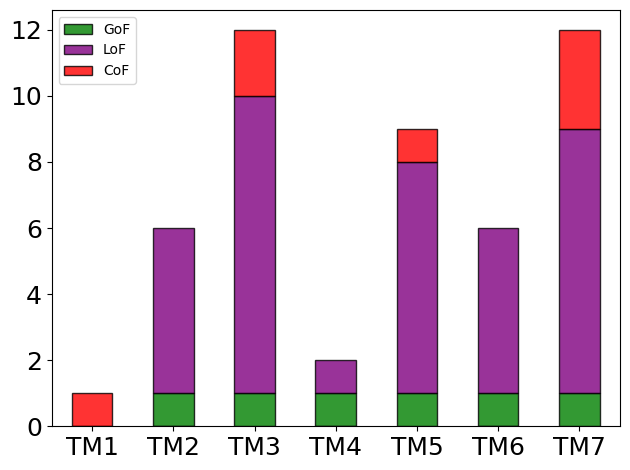

In [14]:
plt.figure(figsize=(5, 4))
my_pal = {'GoF': 'green', \
          'LoF': 'purple', \
         'CoF':'red'}
bias_df.T.plot.bar(stacked=True, edgecolor='k', color=my_pal, alpha=0.8)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
#plt.savefig('functional_residues_per_TM.png', dpi=250)